In [1]:
import sys
import pickle
sys.path.append("../tools/")

from feature_format import featureFormat, targetFeatureSplit
from tester import dump_classifier_and_data

In [2]:
### Task 1: Select what features you'll use.
import pandas as pd
import numpy as np

#fpm = "final_project_dataset_modified.pkl" 
fp = "final_project_dataset.pkl"

#fpm_df = pickle.load( open(fpm, "r"))
fp_df = pickle.load( open(fp, "r") )

### features_list is a list of strings, each of which is a feature name.
### The first feature must be "poi".
#fpm_df = pd.DataFrame(fpm_df)
fp_df = pd.DataFrame(fp_df)

#print fp_df.head(5)

### Transpose

Because the rows and columns of dataset are features and samples respectivey, I transposed it to be rows for samples and columns for features. The reason for the transpose is that pandas dataframe provide easy way to extract columns in a dataset using using column's name like *__dataset[variable_name]__* rather than row indice.

In [3]:
fp_df = fp_df.T

#features_list = ['poi','salary'] # You will need to use more features

### Convert NaN to 0

Firstly, convert string type **NaN** value to **np.nan**, so that fillna() function of pandas can work.

In [4]:
fp_df = fp_df.applymap(lambda x: np.nan if x == 'NaN' else x)
#fp_df.head()

Convert np.nan value to 0

In [5]:
fp_df.fillna(0, inplace=True)
fp_df.isnull().values.any()
fp_df.head()

,bonus,deferral_payments,deferred_income,director_fees,email_address,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,...,long_term_incentive,other,poi,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
ALLEN PHILLIP K,4175000.0,2869717.0,-3081055.0,0.0,phillip.allen@enron.com,1729541.0,13868.0,2195.0,47.0,65.0,...,304805.0,152.0,False,126027.0,-126027.0,201955.0,1407.0,2902.0,4484442.0,1729541.0
BADUM JAMES P,0.0,178980.0,0.0,0.0,0,257817.0,3486.0,0.0,0.0,0.0,...,0.0,0.0,False,0.0,0.0,0.0,0.0,0.0,182466.0,257817.0
BANNANTINE JAMES M,0.0,0.0,-5104.0,0.0,james.bannantine@enron.com,4046157.0,56301.0,29.0,39.0,0.0,...,0.0,864523.0,False,1757552.0,-560222.0,477.0,465.0,566.0,916197.0,5243487.0
BAXTER JOHN C,1200000.0,1295738.0,-1386055.0,0.0,0,6680544.0,11200.0,0.0,0.0,0.0,...,1586055.0,2660303.0,False,3942714.0,0.0,267102.0,0.0,0.0,5634343.0,10623258.0
BAY FRANKLIN R,400000.0,260455.0,-201641.0,0.0,frank.bay@enron.com,0.0,129142.0,0.0,0.0,0.0,...,0.0,69.0,False,145796.0,-82782.0,239671.0,0.0,0.0,827696.0,63014.0


In [27]:
features = fp_df.keys()
features = features.drop('email_address')
values = fp_df.values

#values
#features

### Remove Outlier

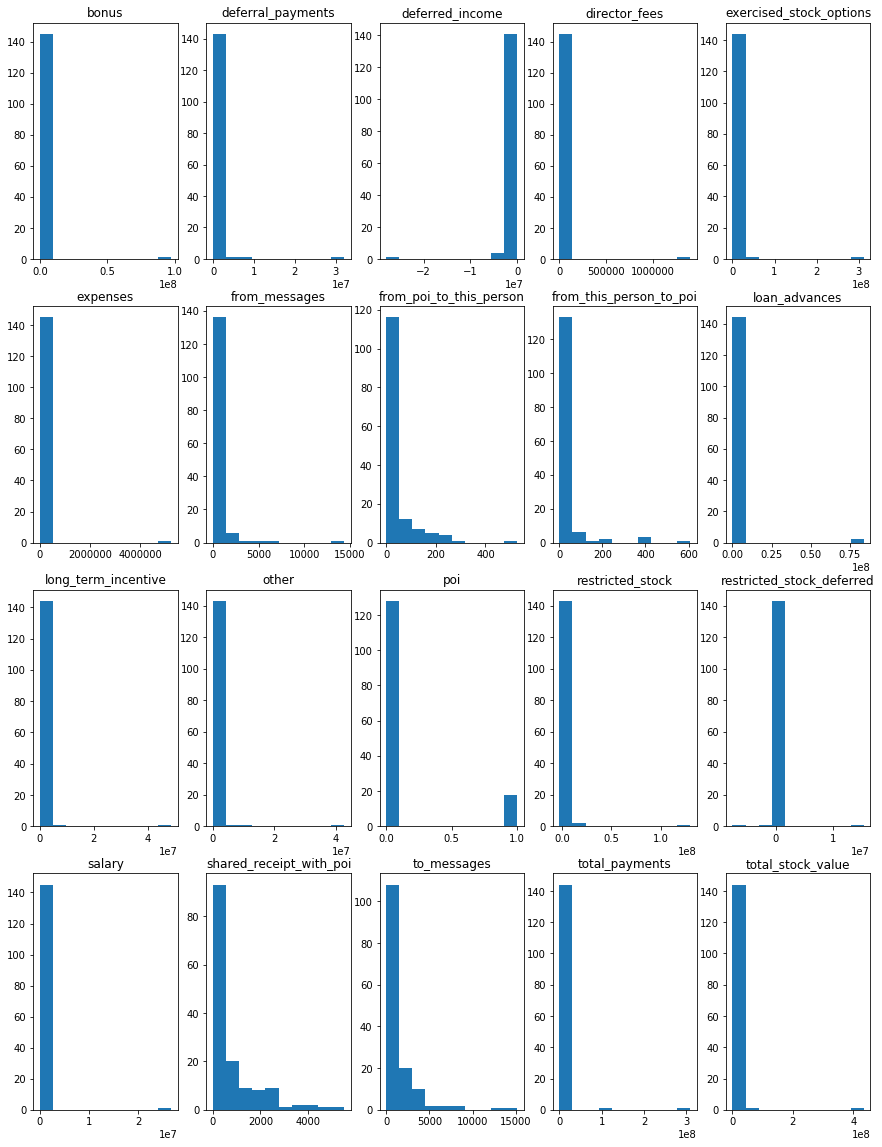

In [48]:
fig, ax = plt.subplots(4, 5, figsize = (15, 20))

for i in xrange(4):
    for j in xrange(5):
        ax[i, j].hist(fp_df[features[i*5+j]])
        #ax[i, j].plot(x, y_25th, x, y_75th)
        ax[i, j].set_title(features[i*5+j])

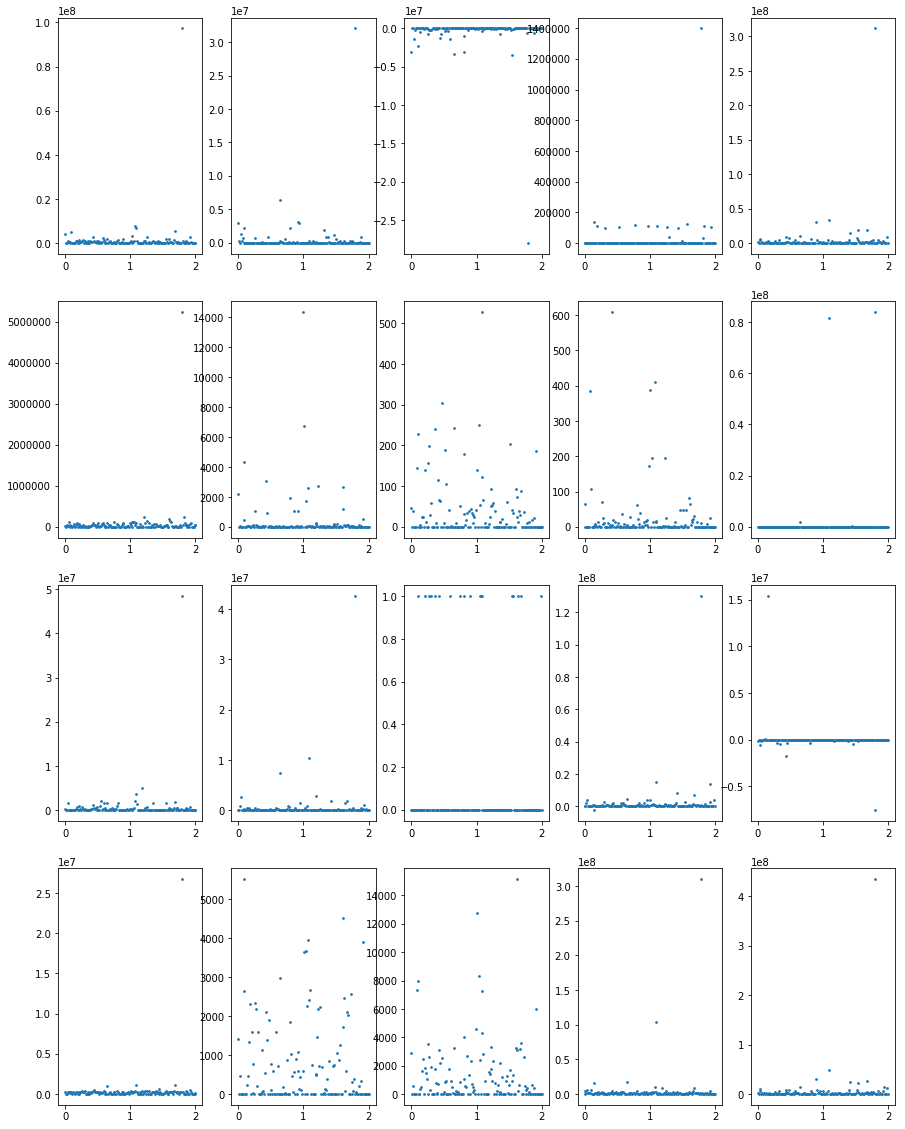

In [65]:
fig, ax = plt.subplots(4, 5, figsize = (15, 20))

for i in xrange(4):
    for j in xrange(5):
    
        x = np.linspace(0, 2, len(fp_df[features[i*5+j]]))
        ax[i, j].scatter(x, fp_df[features[i*5+j]], s = 3)

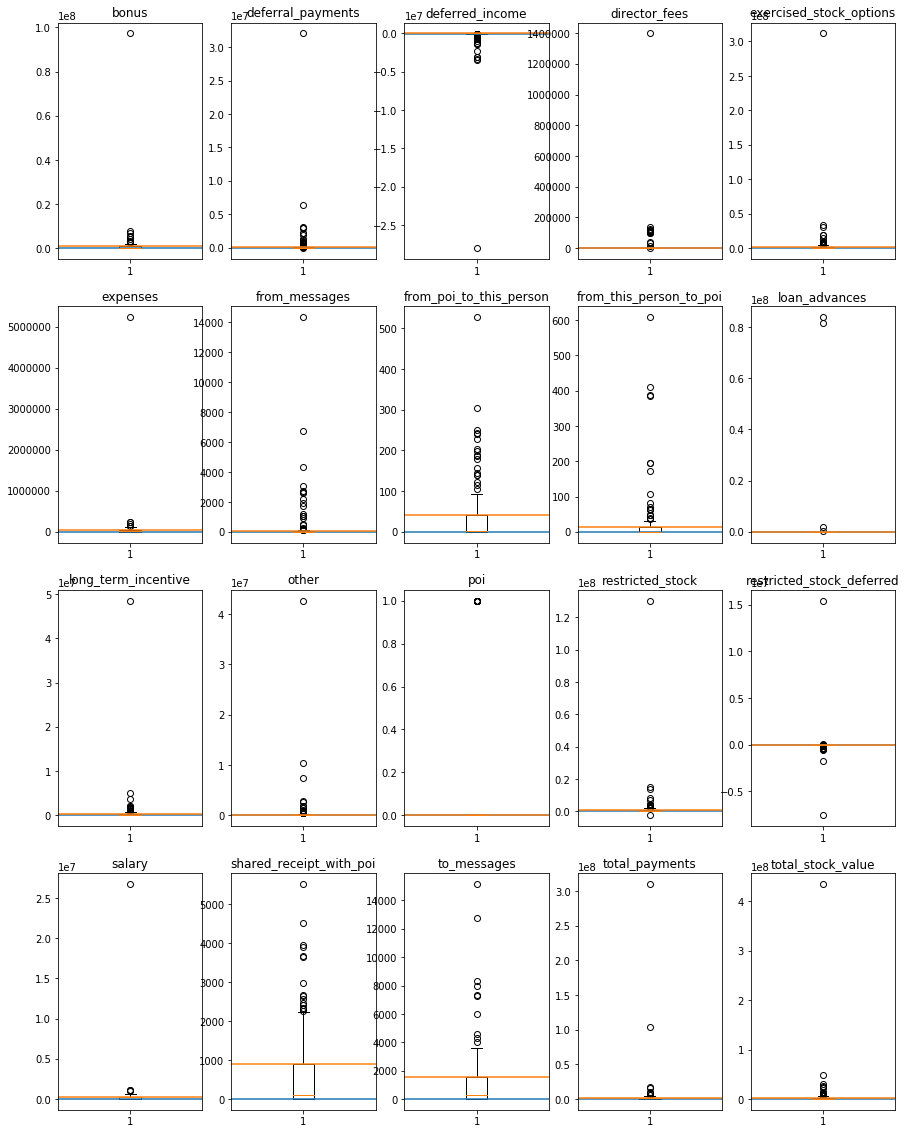

In [33]:
fig, ax = plt.subplots(4, 5, figsize = (15, 20))

for i in xrange(4):
    for j in xrange(5):
        
        #print i*5+j
        #print features[i*5+j]

        per_25th = np.percentile(fp_df[features[i*5+j]], 25)
        per_75th = np.percentile(fp_df[features[i*5+j]], 75)

        x = np.linspace(0, 2, 100)
        y_25th = np.ones(100) * per_25th
        y_75th = np.ones(100) * per_75th
        
        ax[i, j].boxplot(fp_df[features[i*5+j]])
        ax[i, j].plot(x, y_25th, x, y_75th)
        ax[i, j].set_title(features[i*5+j])

In [41]:
features

Index([u'bonus', u'deferral_payments', u'deferred_income', u'director_fees',
       u'exercised_stock_options', u'expenses', u'from_messages',
       u'from_poi_to_this_person', u'from_this_person_to_poi',
       u'loan_advances', u'long_term_incentive', u'other', u'poi',
       u'restricted_stock', u'restricted_stock_deferred', u'salary',
       u'shared_receipt_with_poi', u'to_messages', u'total_payments',
       u'total_stock_value'],
      dtype='object')

0.0 9684.5


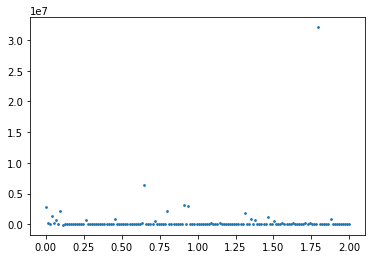

In [61]:
values = fp_df['deferral_payments'].values
u = np.percentile(values, 25)
d = np.percentile(values, 75)

x = np.linspace(0, 2, len(values))

print u, d

plt.scatter(x, values, s = 3)

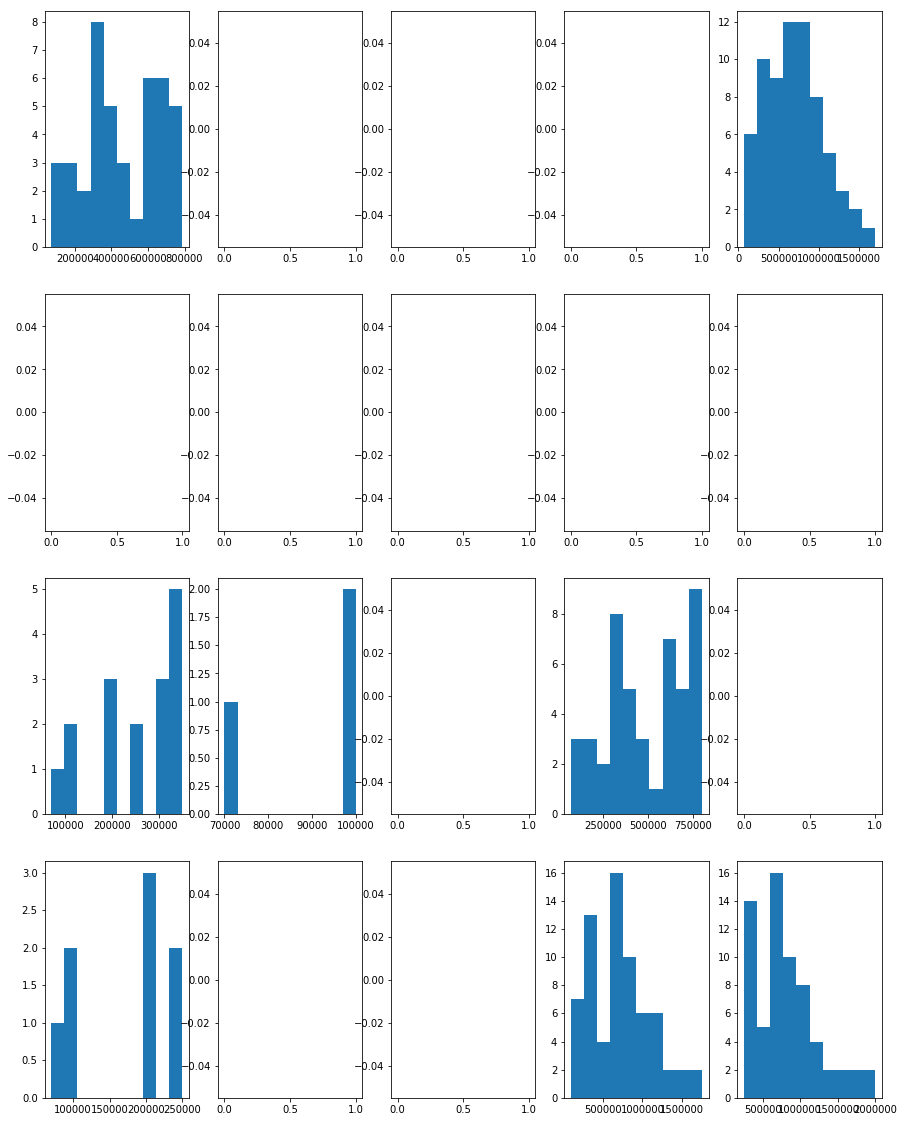

In [40]:
fig, ax = plt.subplots(4, 5, figsize = (15, 20))

for i in xrange(4):
    for j in xrange(5):
        per_25th = np.percentile(fp_df[features[i*5+j]], 25)
        per_75th = np.percentile(fp_df[features[i*5+j]], 75)
        
        values = fp_df['bonus'].values
        values = values[values > per_25th]
        values = values[values < per_75th]
        '''
        x = np.linspace(0, 2, 100)
        y_25th = np.ones(100) * per_25th
        y_75th = np.ones(100) * per_75th
        '''
        #ax[i, j].boxplot(values)
        ax[i, j].hist(values)
        #ax[i, j].plot(x, y_25th, x, y_75th)
        #ax[i, j].set_title(features[i*5+j])

# Scaling

In [ ]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

sclr = MinMaxScaler(feature_range=(0, 1))

Scaling to have range from 0 to 1, expect email_address variable

In [ ]:
scaled_value = sclr.fit_transform(fp_df[features.drop('email_address')])
#rescaled_value = sclr.fit_transform(fp_df[features.drop('email_address')])

In [ ]:
scaled_value